In [17]:
!pip3 install matplotlib.plot

Could not install packages due to an EnvironmentError: 404 Client Error: Not Found for url: https://pypi.org/simple/matplotlib-plot/



In [5]:
!pip3 install seaborn

  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 215kB 1.6MB/s ta 0:00:01
  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 26.1MB 58kB/s  eta 0:00:01


In [18]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sbn

In [44]:
df = pd.read_csv('appstore_games.csv')
df.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [45]:
df.drop(["URL","ID","Subtitle","Icon URL","In-app Purchases","Description","Languages","Size","Genres","Original Release Date","Current Version Release Date"], axis=1, inplace=True)

In [46]:
df.columns = ['name','average_user_rating','user_rating_count','price','developer','age_rating','genre']
df.head()

,name,average_user_rating,user_rating_count,price,developer,age_rating,genre
0,Sudoku,4.0,3553.0,2.99,Mighty Mighty Good Games,4+,Games
1,Reversi,3.5,284.0,1.99,Kiss The Machine,4+,Games
2,Morocco,3.0,8376.0,0.00,Bayou Games,4+,Games
3,Sudoku (Free),3.5,190394.0,0.00,Mighty Mighty Good Games,4+,Games
4,Senet Deluxe,3.5,28.0,2.99,RoGame Software,4+,Games


In [47]:
df.isnull().sum()

name                      0
average_user_rating    9446
user_rating_count      9446
price                    24
developer                 0
age_rating                0
genre                     0
dtype: int64

In [42]:
def impute_median(series):
    return series.fillna(series.median())

In [57]:
#df.average_user_rating = df.average_user_rating.transform(impute_median)
#df.user_rating_count = df.user_rating_count.transform(impute_median)
#df.price = df.price.transform(impute_median)

df.average_user_rating.fillna(df.average_user_rating.median(),inplace=True)
df.user_rating_count.fillna(df.user_rating_count.median(),inplace=True)
df.price.fillna(df.price.median(),inplace=True)
#df.average_user_rating.median()
df.isnull().sum()

name                   0
average_user_rating    0
user_rating_count      0
price                  0
developer              0
age_rating             0
genre                  0
dtype: int64

In [61]:
df.age_rating = df.age_rating.apply(lambda x: str(x).replace('+',''))
df.age_rating = df.age_rating.apply(lambda x: str(x).replace('4','child') if '4' in str(x) else str(x))
df.age_rating = df.age_rating.apply(lambda x: str(x).replace('9','child') if '9' in str(x) else str(x))
df.age_rating = df.age_rating.apply(lambda x: str(x).replace('12','teenager') if '12' in str(x) else str(x))
df.age_rating = df.age_rating.apply(lambda x: str(x).replace('17','teenager') if '17' in str(x) else str(x))
df

,name,average_user_rating,user_rating_count,price,developer,age_rating,genre
0,Sudoku,4.0,3553.0,2.99,Mighty Mighty Good Games,child,Games
1,Reversi,3.5,284.0,1.99,Kiss The Machine,child,Games
2,Morocco,3.0,8376.0,0.00,Bayou Games,child,Games
3,Sudoku (Free),3.5,190394.0,0.00,Mighty Mighty Good Games,child,Games
4,Senet Deluxe,3.5,28.0,2.99,RoGame Software,child,Games
...,...,...,...,...,...,...,...
17002,Stack Puzzle : Rise Tower,4.5,46.0,0.00,Zhigang Pei,child,Games
17003,EachOther,4.5,46.0,0.00,Sultan Shindi,child,Games
17004,Rabbit Vs Tortoise,4.5,46.0,0.00,Vishal Baldha,child,Games
17005,FaTaLL,4.5,46.0,0.00,Tayrem Games,child,Games


In [62]:
df.age_rating.value_counts()

child       14287
teenager     2720
Name: age_rating, dtype: int64

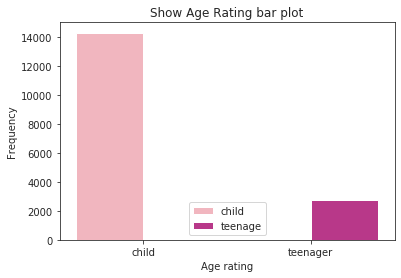

In [83]:
sbn.set_style("ticks")
sbn.barplot(x=df['age_rating'].value_counts().index, y=df['age_rating'].value_counts().values, palette="RdPu", hue=['child','teenage'])
plt.pyplot.xlabel('Age rating')
plt.pyplot.legend(loc=8)
plt.pyplot.ylabel('Frequency')
plt.pyplot.title("Show Age Rating bar plot")

plt.pyplot.show()

In [76]:
df.sort_values(by=['average_user_rating','genre'],ascending=False)

,name,average_user_rating,user_rating_count,price,developer,age_rating,genre
935,ESQD Mobile,5.0,14.0,0.00,Serco Inc.,child,Utilities
1545,Train Game Assistant,5.0,12.0,0.00,Stasis Software LLC,child,Utilities
3444,Hex Isle Map,5.0,11.0,0.00,Nikolay Abalov,child,Utilities
12390,ScoreFive,5.0,5.0,0.00,Varun Santhanam,child,Utilities
16216,Stats & Tools for Brawl Stars,5.0,63.0,0.00,Rome Rock LLC,child,Utilities
...,...,...,...,...,...,...,...
8713,Bounce Bullet:Kill Shot Bravo - A Free Shootin...,1.0,6.0,0.00,Jing Liu,teenager,Games
9081,Pro Builds for LoL,1.0,6.0,0.00,\xc1lvaro Girona,child,Games
11011,Harbor Master: Caribbean Merchant,1.0,8.0,0.99,Evgeni Petkov,child,Games
12235,Lightning: D-Day,1.0,6.0,4.99,HexWar Games Ltd,child,Games


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 7 columns):
name                   17007 non-null object
average_user_rating    17007 non-null float64
user_rating_count      17007 non-null float64
price                  17007 non-null float64
developer              17007 non-null object
age_rating             17007 non-null object
genre                  17007 non-null object
dtypes: float64(3), object(4)
memory usage: 930.2+ KB


In [73]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
average_user_rating,17007.0,4.304786,0.546465,1.0,4.5,4.5,4.5,5.00
user_rating_count,17007.0,1495.572353,28264.837176,5.0,46.0,46.0,46.0,3032734.00
price,17007.0,0.812271,7.830260,0.0,0.0,0.0,0.0,179.99


In [75]:
df.corr()

,average_user_rating,user_rating_count,price
average_user_rating,1.000000,0.007339,0.010916
user_rating_count,0.007339,1.000000,-0.003868
price,0.010916,-0.003868,1.000000
